In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from PIL import Image

In [2]:
# Chemin vers le répertoire contenant les images d'entraînement
train_dir = r"C:\\Users\\marti\\OneDrive\\Martin OneDrive\\ISEP\\A2\\Semestre 2\\Ai and optimisation\\Projet\train\\Test 28-04-2023\\Entrainement\\"

# Charger les noms des fichiers d'images d'entraînement et leurs étiquettes
train_images = []
train_labels = []

for label, class_name in enumerate(os.listdir(train_dir)):
    class_dir = os.path.join(train_dir, class_name)
    for filename in os.listdir(class_dir):
        img_path = os.path.join(class_dir, filename)
        img = Image.open(img_path)
        img = img.resize((256, 256))
        img = img.convert("RGB")
        img_array = np.array(img) / 255.0  # Convertir en tableau NumPy et normaliser les valeurs des pixels
        train_images.append(img_array)
        train_labels.append(label)
        print(img_path)

C:\\Users\\marti\\OneDrive\\Martin OneDrive\\ISEP\\A2\\Semestre 2\\Ai and optimisation\\Projet\train\\Test 28-04-2023\\Entrainement\\Bee\IMG_ZX_1.JPG
C:\\Users\\marti\\OneDrive\\Martin OneDrive\\ISEP\\A2\\Semestre 2\\Ai and optimisation\\Projet\train\\Test 28-04-2023\\Entrainement\\Bee\IMG_ZX_10.JPG
C:\\Users\\marti\\OneDrive\\Martin OneDrive\\ISEP\\A2\\Semestre 2\\Ai and optimisation\\Projet\train\\Test 28-04-2023\\Entrainement\\Bee\IMG_ZX_11.JPG
C:\\Users\\marti\\OneDrive\\Martin OneDrive\\ISEP\\A2\\Semestre 2\\Ai and optimisation\\Projet\train\\Test 28-04-2023\\Entrainement\\Bee\IMG_ZX_12.JPG
C:\\Users\\marti\\OneDrive\\Martin OneDrive\\ISEP\\A2\\Semestre 2\\Ai and optimisation\\Projet\train\\Test 28-04-2023\\Entrainement\\Bee\IMG_ZX_13.JPG
C:\\Users\\marti\\OneDrive\\Martin OneDrive\\ISEP\\A2\\Semestre 2\\Ai and optimisation\\Projet\train\\Test 28-04-2023\\Entrainement\\Bee\IMG_ZX_14.JPG
C:\\Users\\marti\\OneDrive\\Martin OneDrive\\ISEP\\A2\\Semestre 2\\Ai and optimisation\\Projet\

C:\\Users\\marti\\OneDrive\\Martin OneDrive\\ISEP\\A2\\Semestre 2\\Ai and optimisation\\Projet\train\\Test 28-04-2023\\Entrainement\\Bee\IMG_ZX_47.JPG
C:\\Users\\marti\\OneDrive\\Martin OneDrive\\ISEP\\A2\\Semestre 2\\Ai and optimisation\\Projet\train\\Test 28-04-2023\\Entrainement\\Bee\IMG_ZX_48.JPG
C:\\Users\\marti\\OneDrive\\Martin OneDrive\\ISEP\\A2\\Semestre 2\\Ai and optimisation\\Projet\train\\Test 28-04-2023\\Entrainement\\Bee\IMG_ZX_5.JPG
C:\\Users\\marti\\OneDrive\\Martin OneDrive\\ISEP\\A2\\Semestre 2\\Ai and optimisation\\Projet\train\\Test 28-04-2023\\Entrainement\\Bee\IMG_ZX_50.JPG
C:\\Users\\marti\\OneDrive\\Martin OneDrive\\ISEP\\A2\\Semestre 2\\Ai and optimisation\\Projet\train\\Test 28-04-2023\\Entrainement\\Bee\IMG_ZX_51.JPG
C:\\Users\\marti\\OneDrive\\Martin OneDrive\\ISEP\\A2\\Semestre 2\\Ai and optimisation\\Projet\train\\Test 28-04-2023\\Entrainement\\Bee\IMG_ZX_52.JPG
C:\\Users\\marti\\OneDrive\\Martin OneDrive\\ISEP\\A2\\Semestre 2\\Ai and optimisation\\Projet\

C:\\Users\\marti\\OneDrive\\Martin OneDrive\\ISEP\\A2\\Semestre 2\\Ai and optimisation\\Projet\train\\Test 28-04-2023\\Entrainement\\Bumblebee\IMG_ZX_125.JPG
C:\\Users\\marti\\OneDrive\\Martin OneDrive\\ISEP\\A2\\Semestre 2\\Ai and optimisation\\Projet\train\\Test 28-04-2023\\Entrainement\\Bumblebee\IMG_ZX_126.JPG
C:\\Users\\marti\\OneDrive\\Martin OneDrive\\ISEP\\A2\\Semestre 2\\Ai and optimisation\\Projet\train\\Test 28-04-2023\\Entrainement\\Bumblebee\IMG_ZX_127.JPG
C:\\Users\\marti\\OneDrive\\Martin OneDrive\\ISEP\\A2\\Semestre 2\\Ai and optimisation\\Projet\train\\Test 28-04-2023\\Entrainement\\Bumblebee\IMG_ZX_128.JPG
C:\\Users\\marti\\OneDrive\\Martin OneDrive\\ISEP\\A2\\Semestre 2\\Ai and optimisation\\Projet\train\\Test 28-04-2023\\Entrainement\\Bumblebee\IMG_ZX_129.JPG
C:\\Users\\marti\\OneDrive\\Martin OneDrive\\ISEP\\A2\\Semestre 2\\Ai and optimisation\\Projet\train\\Test 28-04-2023\\Entrainement\\Bumblebee\IMG_ZX_130.JPG
C:\\Users\\marti\\OneDrive\\Martin OneDrive\\ISEP\\A

C:\\Users\\marti\\OneDrive\\Martin OneDrive\\ISEP\\A2\\Semestre 2\\Ai and optimisation\\Projet\train\\Test 28-04-2023\\Entrainement\\Butterfly\IMG_ZX_192.JPG
C:\\Users\\marti\\OneDrive\\Martin OneDrive\\ISEP\\A2\\Semestre 2\\Ai and optimisation\\Projet\train\\Test 28-04-2023\\Entrainement\\Butterfly\IMG_ZX_207.JPG
C:\\Users\\marti\\OneDrive\\Martin OneDrive\\ISEP\\A2\\Semestre 2\\Ai and optimisation\\Projet\train\\Test 28-04-2023\\Entrainement\\Butterfly\IMG_ZX_208.JPG
C:\\Users\\marti\\OneDrive\\Martin OneDrive\\ISEP\\A2\\Semestre 2\\Ai and optimisation\\Projet\train\\Test 28-04-2023\\Entrainement\\Butterfly\IMG_ZX_224.JPG
C:\\Users\\marti\\OneDrive\\Martin OneDrive\\ISEP\\A2\\Semestre 2\\Ai and optimisation\\Projet\train\\Test 28-04-2023\\Entrainement\\Butterfly\IMG_ZX_225.JPG
C:\\Users\\marti\\OneDrive\\Martin OneDrive\\ISEP\\A2\\Semestre 2\\Ai and optimisation\\Projet\train\\Test 28-04-2023\\Entrainement\\Butterfly\IMG_ZX_236.JPG
C:\\Users\\marti\\OneDrive\\Martin OneDrive\\ISEP\\A

In [3]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)


class_names = ['Bee', 'Bumblebee', 'Butterfly', 'Dragonfly', 'Hoverfly',
               'Wasp']

print(train_labels)
print(train_images.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 3 4 4 4 4 4 4 5 5 5 5 5 5]
(185, 256, 256, 3)


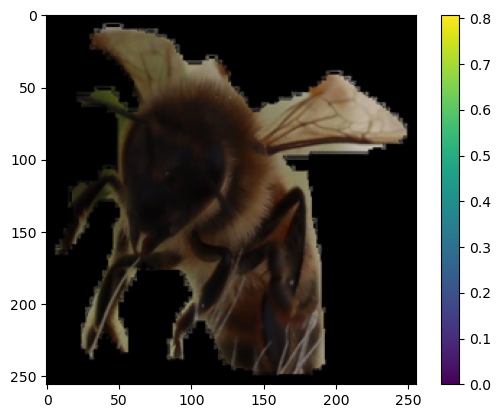

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

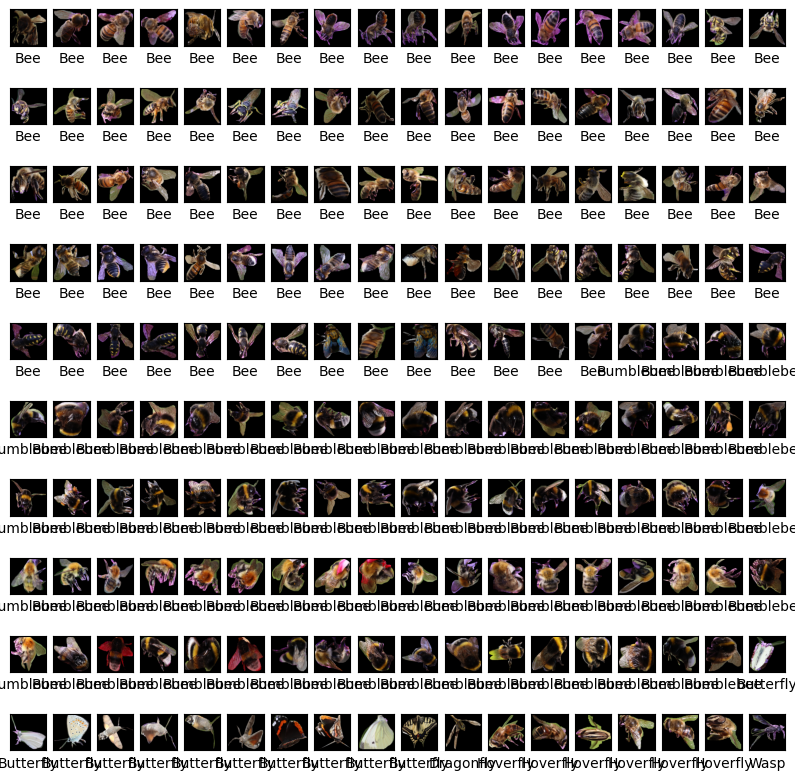

In [5]:
plt.figure(figsize=(10,10))
for i in range(180):
    plt.subplot(10,18,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(256, 256,3)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='linear'),
])

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20


6/6 [==============================] - 11s 2s/step - loss: 56.7838 - accuracy: 0.4324
Epoch 2/20
6/6 [==============================] - 10s 2s/step - loss: 17.1430 - accuracy: 0.4541
Epoch 3/20
6/6 [==============================] - 10s 2s/step - loss: 12.0355 - accuracy: 0.5892
Epoch 4/20
6/6 [==============================] - 10s 2s/step - loss: 9.4323 - accuracy: 0.5892
Epoch 5/20
6/6 [==============================] - 10s 2s/step - loss: 4.6808 - accuracy: 0.6757
Epoch 6/20
6/6 [==============================] - 10s 2s/step - loss: 2.9706 - accuracy: 0.7892
Epoch 7/20
6/6 [==============================] - 10s 2s/step - loss: 1.9501 - accuracy: 0.7784
Epoch 8/20
6/6 [==============================] - 10s 2s/step - loss: 1.2020 - accuracy: 0.8216
Epoch 9/20
6/6 [==============================] - 10s 2s/step - loss: 1.4542 - accuracy: 0.8541
Epoch 10/20
6/6 [==============================] - 10s 2s/step - loss: 0.5849 - accuracy: 0.9297
Epoch 11/20
6/6 [=================

In [9]:
# Chemin vers le répertoire contenant les images de test
test_dir = r"C:\\Users\\marti\\OneDrive\\Martin OneDrive\\ISEP\\A2\\Semestre 2\\Ai and optimisation\\Projet\train\\Test 28-04-2023\\IMG_ZX\\"

# Charger les images de test
test_images = []
test_filenames = []
for filename in os.listdir(test_dir):
    img_path = os.path.join(test_dir, filename)
    img = Image.open(img_path)
    img = img.resize((256, 256))
    img = img.convert("RGB")
    img_array = np.array(img) / 255.0
    test_images.append(img_array)  
    test_filenames.append(filename)
    
test_images = np.array(test_images)

In [10]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [11]:
predictions = probability_model.predict(test_images)

8/8 [==============================] - 1s 71ms/step


In [12]:
predictions[0]

array([9.9999523e-01, 5.3485616e-07, 3.5596739e-07, 1.1001429e-09,
       3.8696589e-06, 6.6801981e-08], dtype=float32)

In [13]:
np.argmax(predictions[0])
class_names[4]

'Hoverfly'

In [14]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(256, 256, 3)


In [15]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 256, 256, 3)


In [16]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 65ms/step
[[1.00000000e+00 2.44617059e-15 1.83005293e-20 3.44897351e-20
  1.45680707e-16 1.01065655e-17]]


In [17]:
np.argmax(predictions_single[0])

0

In [18]:
import pandas as pd

# Créer une liste pour stocker les résultats
results = []

# Prédire chaque classe pour chaque image
for i, (img, filename) in enumerate(zip(test_images, test_filenames)):
    # Ajouter l'image à un lot où elle est le seul membre
    img = np.expand_dims(img, 0)
    
    # Prédire la classe pour cette image
    predictions_single = probability_model.predict(img)
    
    # Trouver l'index de la classe prédite
    predicted_class_index = np.argmax(predictions_single[0])
    
    # Récupérer le pourcentage de chance que cela soit cette classe
    confidence = predictions_single[0][predicted_class_index] * 100
    
    # Ajouter les résultats à la liste
    results.append([filename, class_names[predicted_class_index], confidence])

# Créer un DataFrame à partir des résultats
df = pd.DataFrame(results, columns=['Nom du fichier', 'Classe prédite', 'Pourcentage de confiance'])

# Enregistrer le DataFrame dans un fichier Excel
df.to_excel('predictions1.xlsx', index=False)

1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 80ms/step
